In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
filename = 'properties.csv'
props = pd.read_csv(filename)

In [120]:
props.head()

,acid,mass,volume,hydrophobicity,number_of_atoms
0,A,71.0779,88.6,1.8,13.0
1,R,156.1857,173.4,-4.5,26.0
2,N,114.1026,114.1,-3.5,17.0
3,D,115.0874,111.1,-3.5,16.0
4,B,NaN,NaN,NaN,NaN


In [24]:
filename = 'codone_tsne.csv'
df = pd.read_csv(filename, index_col=0)

In [121]:
df.head()

,0,1,codone
0,0.086625,3.738930,VNR
1,3.416830,-4.018082,SGS
2,-0.863672,3.004022,APW
3,0.743383,3.083894,HLT
4,-7.709858,2.979795,AEE


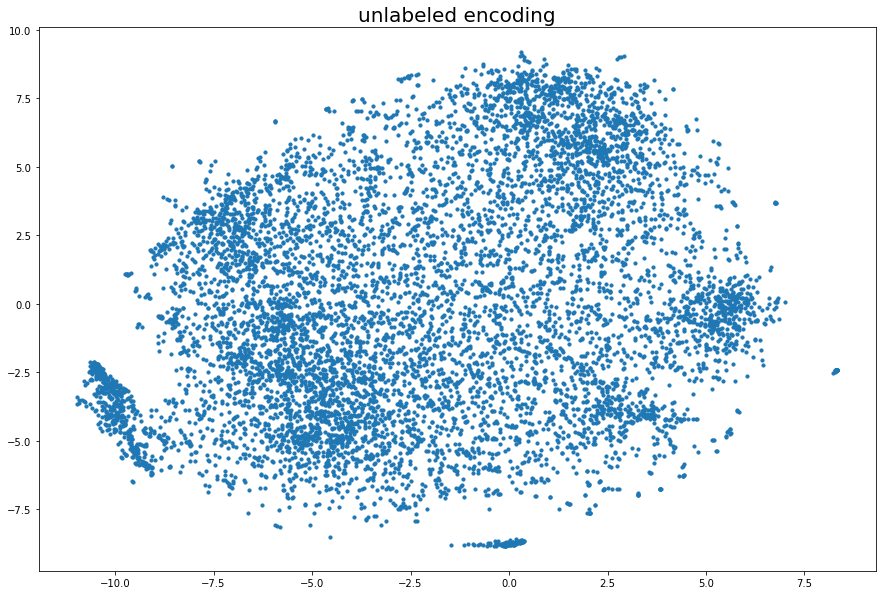

In [119]:
plt.figure(figsize=(15, 10))
plt.title('unlabeled encoding', fontsize=20)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=10)
plt.show()

In [69]:
def acid_dict(some_c, props, tsne_df):
    prop_by_letter = [props[props.acid == let].iloc[:, 1:] for let in some_c]   
    df_concat = pd.concat(prop_by_letter)
    res = df_concat.mean()
    dres = dict(res)
    dres['acid'] = some_c
    x0 = tsne_df[tsne_df.codone == some_c].iloc[0, 0]
    x1 = tsne_df[tsne_df.codone == some_c].iloc[0, 1]
    dres['x0'] = x0
    dres['x1'] = x1
    return dres

In [72]:
all_acid_dicts = [acid_dict(some_c, props, df) for some_c in df.codone]

In [73]:
final_df = pd.DataFrame(all_acid_dicts)

In [74]:
final_df.head()

,acid,hydrophobicity,mass,number_of_atoms,volume,x0,x1
0,VNR,-1.266667,123.139800,20.666667,142.500000,0.086625,3.738930
1,SGS,-0.666667,77.068633,12.666667,79.366667,3.416830,-4.018082
2,APW,-0.233333,118.134333,19.000000,143.033333,-0.863672,3.004022
3,HLT,-0.033333,117.133600,19.666667,145.333333,0.743383,3.083894
4,AEE,-1.733333,109.768633,17.000000,121.800000,-7.709858,2.979795


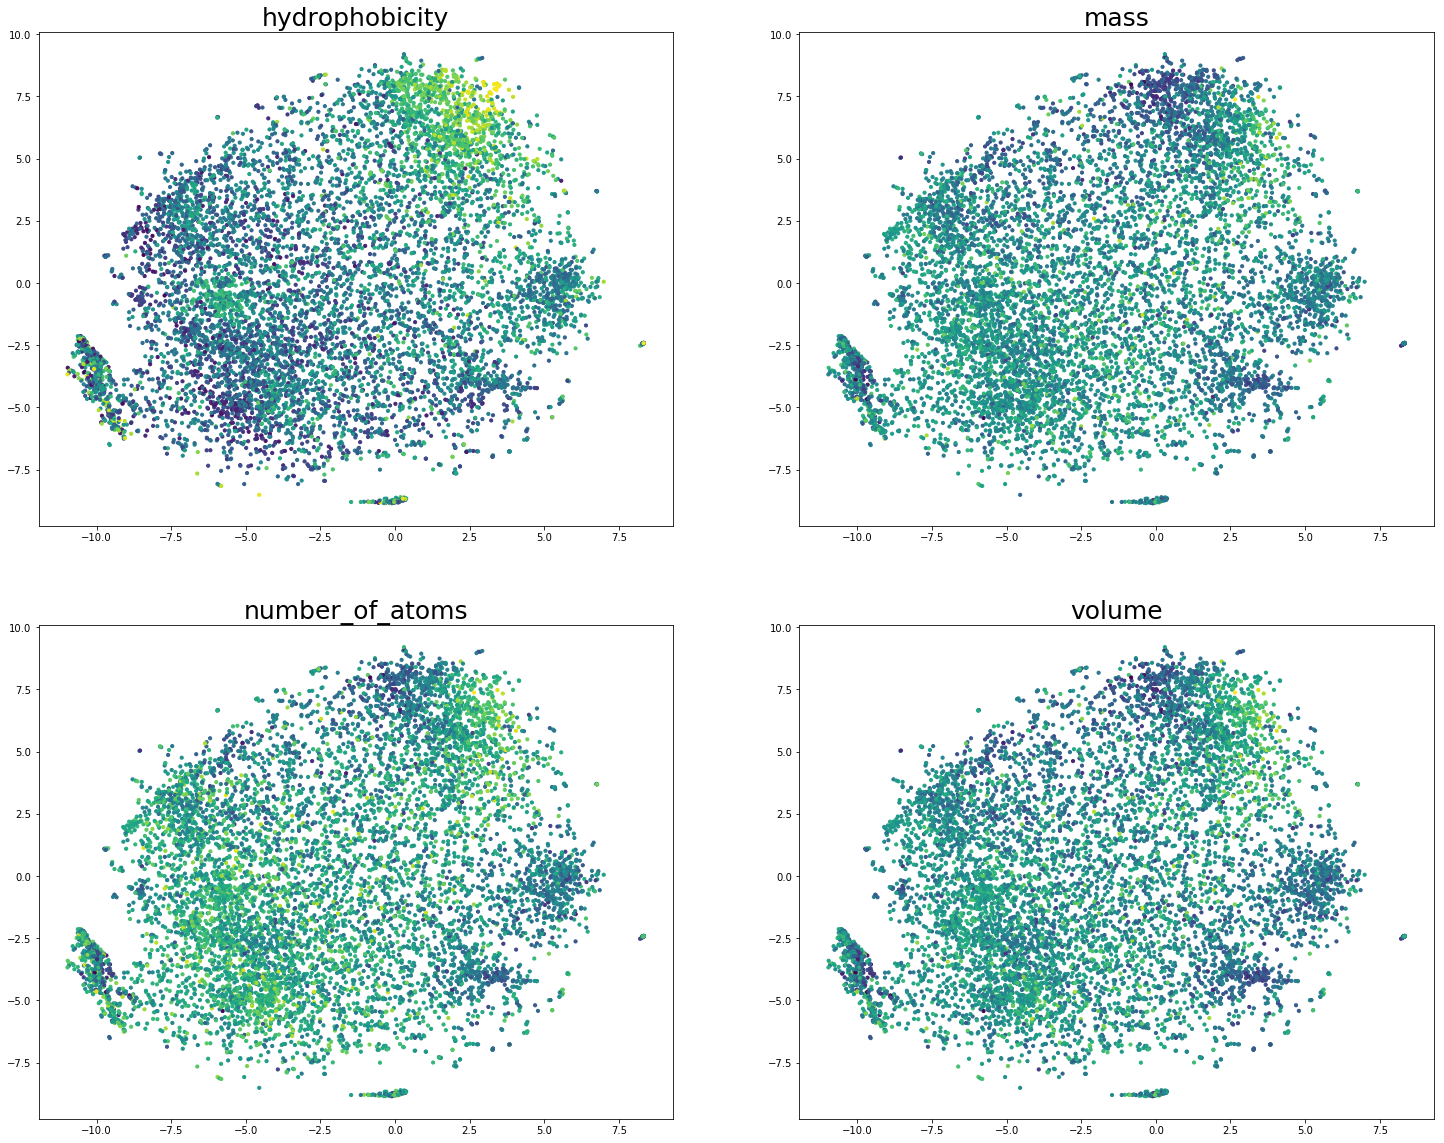

In [114]:
plt.figure(figsize=(25, 20))
for i, p in enumerate(['hydrophobicity', 'mass', 'number_of_atoms', 'volume']):
    plt.subplot(2,2,i+1)
    plt.title(p, fontsize=25)
    plt.scatter(final_df.x0, final_df.x1, c=final_df[p], s=10)
plt.show()